In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../data/raw_diabetes.csv')

In [5]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
491,2,89,90,30,0,33.5,0.292,42,0
711,5,126,78,27,22,29.6,0.439,40,0
366,6,124,72,0,0,27.6,0.368,29,1
761,9,170,74,31,0,44.0,0.403,43,1
589,0,73,0,0,0,21.1,0.342,25,0


In [44]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

In [63]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(['Outcome'] , axis = 1),
                                                      df['Outcome'] , test_size = 0.2 , random_state = 42)

In [64]:
X_train.shape , X_test.shape

((614, 8), (154, 8))

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [68]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = num_cols)

In [71]:
X_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
1,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
2,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
3,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
4,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
149,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
150,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
151,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
152,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


In [72]:
np.round(X_train_scaled.describe() ,1) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0
mean,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.1,-3.8,-3.8,-1.3,-0.7,-4.1,-1.2,-1.0
25%,-0.8,-0.7,-0.3,-1.3,-0.7,-0.6,-0.7,-0.8
50%,-0.2,-0.1,0.1,0.2,-0.3,0.0,-0.3,-0.3
75%,0.7,0.6,0.6,0.8,0.4,0.6,0.4,0.6
max,4.0,2.4,2.8,2.8,6.6,4.5,5.8,4.2


## Checking effects after scaling

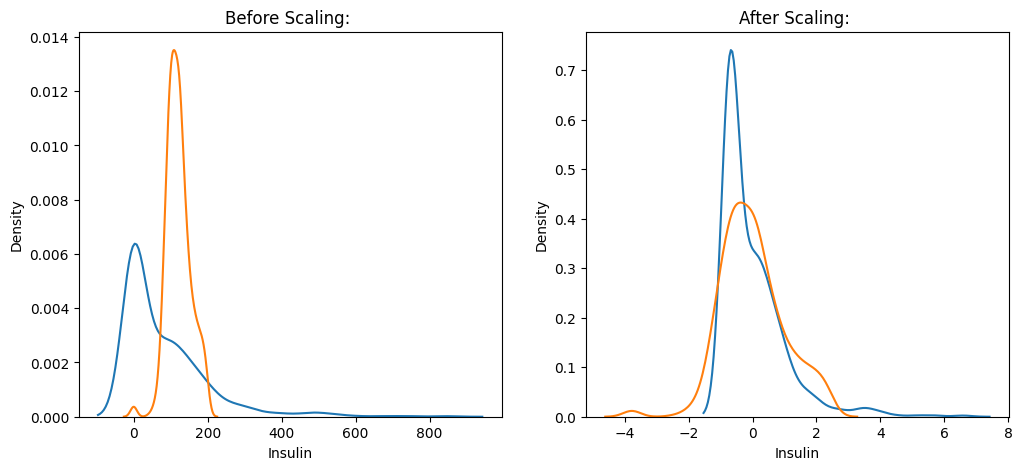

In [79]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

ax1.set_title("Before Scaling: ")
sns.kdeplot(X_train['Insulin'], ax=ax1)
sns.kdeplot(X_train['Glucose'], ax=ax1)

ax2.set_title("After Scaling: ")
sns.kdeplot(X_train_scaled['Insulin'], ax=ax2)
sns.kdeplot(X_train_scaled['Glucose'], ax=ax2)


plt.show()

In [83]:
X_train_df = pd.DataFrame(X_train_scaled, columns = X_train_scaled.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns = X_test_scaled.columns)

In [85]:
train_df = X_train_df.copy()
test_df = X_test_df.copy()

In [88]:
train_df['Outcome'] = y_train.values
test_df['Outcome'] = y_test.values

In [101]:
final_df = pd.concat([train_df , test_df] , axis = 0).reset_index(drop = True)

In [102]:
final_df.to_csv('../data/preprocessed.csv' , index = False)